<a href="https://colab.research.google.com/github/PioneerAlexander/Leveraging-software-evolution-data-with-LLMs/blob/main/CommitPackFT_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CommitPackFT** Data Exploration

# Install dependencies

In [2]:
!pip install datasets transformers[torch]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 19.3 MB/s eta 0:00:00


# Load dataset

In [3]:
from datasets import load_dataset

dataset = load_dataset("bigcode/commitpackft", 'python')["train"]

Generating train split:   0%|          | 0/56025 [00:00<?, ? examples/s]

In this notebook we would observe only one of the splits for Python Language. For the exploration of the dataset in general for all splits, reach out to the [original paper](https://arxiv.org/pdf/2308.07124.pdf). The languages distribution graphs are provided from there:

[Link](https://drive.google.com/file/d/1aFPulwfmazKoLGP4axyJ498eIBg57gCK/view?usp=sharing) to the picture with the graphs.

# Explore dataset


# **Data fields description** (from Hugging Face page of the dataset)

## Data Fields
The data fields are the same among all splits:

**commit:** unique commit id

**old_file:** name of the file before the commit

**new_file:** name of the file after the commit

**old_contents:** contents of the file before the commit

**new_contents:** contents of the file after the commit

**subject:** subject of the commit (this is used for all experiments in the paper)

**message:** message of the commit (commonly the same as the subject)

**lang:** programming language

**license:** license of the repository the code stems from, one of ['mit', 'artistic-2.0', 'isc', 'cc0-1.0', 'epl-1.0', 'mpl-2.0', 'unlicense', 'unknown', 'apache-2.0', 'bsd-3-clause', 'agpl-3.0', 'lgpl-2.1', 'bsd-2-clause']

repos: name of the the repository the code stems from (if multiple, they are comma separated)

In [4]:
print(dataset)

Dataset({
    features: ['commit', 'old_file', 'new_file', 'old_contents', 'new_contents', 'subject', 'message', 'lang', 'license', 'repos'],
    num_rows: 56025
})


Let's start with 'commit' section. Let's look how the arbitrary commit looks:

In [31]:
import pandas as pd

print(pd.Series(dataset['commit']).value_counts())

e905334869af72025592de586b81650cb3468b8a    1
fe4f2697afdc280e0158aad1acf9613d1decb32d    1
38b4af0b3c1c6105d68ff453d86107758ef9d751    1
634442dc25385831ce8f165ab8d9d58493a1979a    1
af56e9e9935b2caafe2b13eff3e2dd0d0eb5d980    1
                                           ..
7ab465aaaf69ba114b3411204dd773781a147c41    1
0feb1810b1e3ca61ef15deb71aec9fd1eab3f2da    1
8c159ee5fa6aa1d10cef2268a373b90f6cb72896    1
daca2bb7810b4c8eaf9f6a0598d8c6b41e0f2e10    1
4ec8f09736113630208325cb08f1ffe07e8acc26    1
Length: 56025, dtype: int64


Indeed, just an unique id. Number of unique id's is equal to number of all rows, which proves the statement about the uniqueness

Let's look at the data in the 'old_file' and 'new_file' fields:

In [9]:
print(dataset['old_file'][:5])

['sentry/queue/client.py', 'tests/test_openweather.py', 'src/dashboard/src/main/templatetags/percentage.py', 'automata/base/exceptions.py', 'account_invoice_line_description/res_config.py']


In [10]:
print(dataset['new_file'][:5])

['sentry/queue/client.py', 'tests/test_openweather.py', 'src/dashboard/src/main/templatetags/percentage.py', 'automata/base/exceptions.py', 'account_invoice_line_description/res_config.py']


We assume that the commits are not changing filenames (and their paths), because it is how **CommitPackFT** is filtered. Let's check if all commits indeed are just dealing with one file:

In [30]:
[commit_message for commit_message in dataset if commit_message['old_file'] != commit_message['new_file']]

[]

[CommitPackFT filters description](https://arxiv.org/pdf/2308.07124.pdf) is defined in **Appendix | D Dataset Creation** *(page 29)*

Code inside the 'old_contents' is just a code of a file written in a string with the correct indentation:

In [21]:
print(dataset[0]["new_contents"])

"""
sentry.queue.client
~~~~~~~~~~~~~~~~~~~

:copyright: (c) 2010 by the Sentry Team, see AUTHORS for more details.
:license: BSD, see LICENSE for more details.
"""
from kombu import BrokerConnection
from kombu.common import maybe_declare
from kombu.pools import producers

from sentry.conf import settings
from sentry.queue.queues import task_queues, task_exchange


class Broker(object):
    def __init__(self, config):
        self.connection = BrokerConnection(**config)
        with producers[self.connection].acquire(block=False) as producer:
            for queue in task_queues:
                maybe_declare(queue, producer.channel)

    def delay(self, func, *args, **kwargs):
        payload = {
            "func": func,
            "args": args,
            "kwargs": kwargs,
        }

        with producers[self.connection].acquire(block=False) as producer:
            producer.publish(payload,
                exchange=task_exchange,
                serializer="pickle",
           

In [23]:
print(dataset[8]["new_contents"])

#!/usr/bin/env python
from distutils.core import setup

packages = [
    'upho',
    'upho.phonon',
    'upho.harmonic',
    'upho.analysis',
    'upho.structure',
    'upho.irreps',
    'upho.qpoints',
    'group',
]
scripts = [
    'scripts/upho_weights',
    'scripts/upho_sf',
    'scripts/upho_qpoints',
    'scripts/upho_fit',
]
setup(name='upho',
      version='0.5.3',
      author="Yuji Ikeda",
      author_email="y.ikeda@mpie.de",
      packages=packages,
      scripts=scripts,
      install_requires=['numpy', 'h5py', 'phonopy'])





> We see that there are inside not only class creations, function definitions, but also some source files from Python projects. For every code we can execute it with the standard *exec* command, if we want to check its correctness. Also assuming the dataset is secure, because in uncontrollable deployment *exec* command is highly not recommended to be used.




Let's look how the 'subject' data looks like:


In [28]:
for item in dataset['subject'][:5]:
  print(item)

Declare queues when broker is instantiated
Revert "Fix openweather unit tests"
Fix % only showing 0 or 100%, everything between goes to 0%.
Remove "validation" from RejectionException docstring
Fix implied_group, it still refers to the old module name



> We can notice that the commits are starting with the key words, where the first letter is uppecase. It is not a coincidence: it is one other filter condition when the **CommitPackFT** was created. Refer to **[Table 7: Commit message starting words allowed in COMMITPACKFT](https://arxiv.org/pdf/2308.07124.pdf)**, page 30 for the compete description.




In Hugging Face dataset description stays that the message is commonly the same as the subject. Let's check how many are concide:

In [37]:
unmatched_dataset = dataset.filter(lambda commit: commit['subject'] == commit['message'])
print(unmatched_dataset)

Dataset({
    features: ['commit', 'old_file', 'new_file', 'old_contents', 'new_contents', 'subject', 'message', 'lang', 'license', 'repos'],
    num_rows: 1986
})


In [40]:
print(len(unmatched_dataset) / len(dataset) * 100)

3.544846050870147




> Only for 3,5 % of the commits (for Python language) have no complete match of 'message' and 'subject'.



'lang' data should coincide with the split we have chosen in the start:

In [44]:
check_language_dataset = dataset.filter(lambda commit: commit['lang'] == "Python")
assert(len(check_language_dataset) == len(dataset))

Let's observe the distribution of the 'license' data.


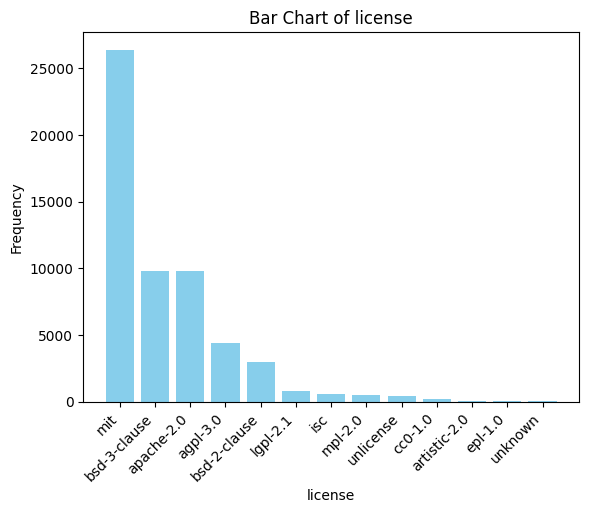

In [51]:
import matplotlib.pyplot as plt
column_name = "license"
column_data = pd.Series(dataset[column_name])
value_counts = column_data.value_counts()
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.title(f'Bar Chart of {column_name}')
plt.xlabel(column_name)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Frequency')
plt.show()


The last field is 'repos'. Let's find out from how many repos the each code stems:

In [58]:
column_name = "repos"
column_data = pd.Series([len(repos.split(",")) for repos in dataset[column_name]])
value_counts = column_data.value_counts()
print(value_counts)

1      15011
2      11306
3       6658
4       6100
5       2478
       ...  
813        1
619        1
576        1
569        1
391        1
Length: 424, dtype: int64
